In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 


In [19]:
iris = datasets.load_iris()

In [20]:
iris_data = pd.DataFrame(iris.data)

In [21]:
iris_data.columns = iris.feature_names

In [22]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data) 
# X_scaled

In [24]:
X_scaled.shape

(150, 4)

In [25]:
from sklearn.decomposition import  PCA
pca = PCA(n_components=2) 
pca_scaled = pca.fit_transform(X_scaled)

In [26]:
pca_scaled.shape

(150, 2)

In [27]:
# plt.scatter(pca_scaled[:,0] , pca_scaled[:,1])

Text(0, 0.5, 'distance')

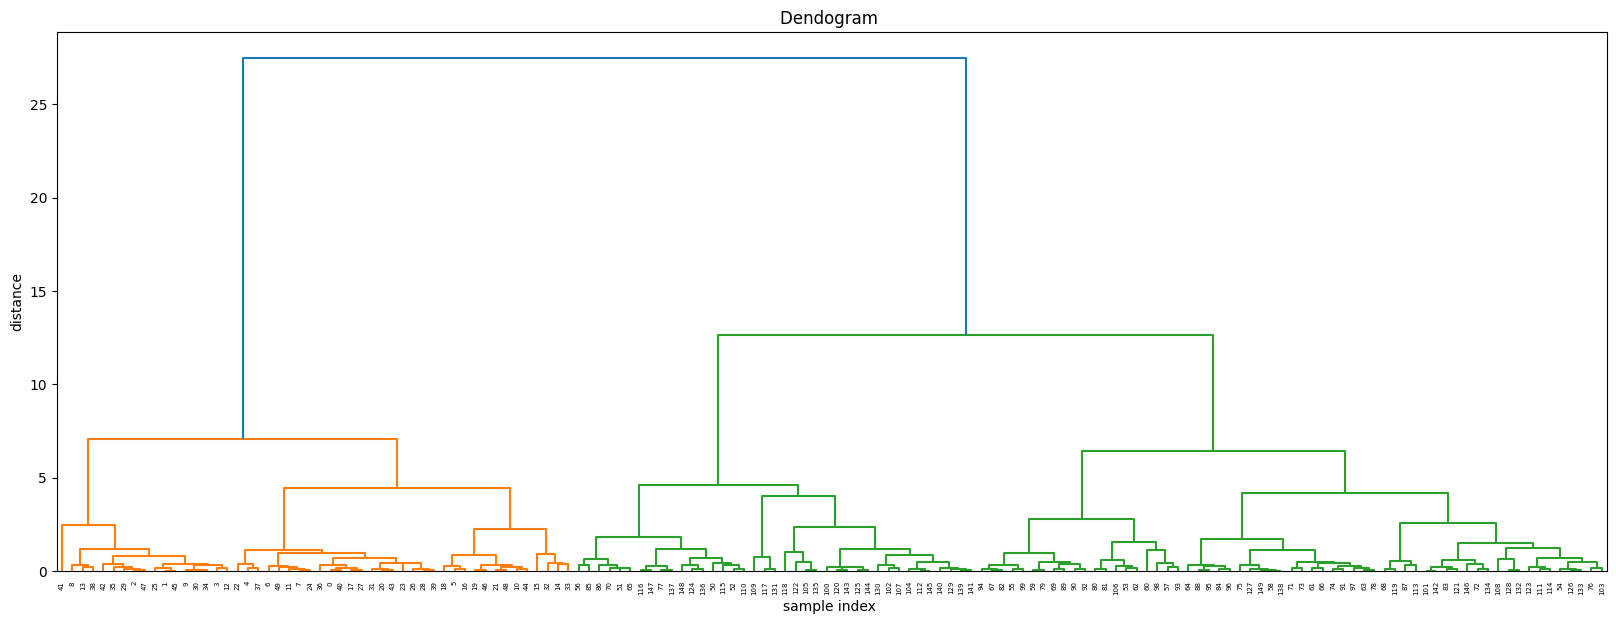

In [28]:
# Agglomerative clustering 
import scipy.cluster.hierarchy as sc 
plt.figure(figsize=(20,7))
plt.title("dendograms")

# create diagrams 
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title("Dendogram ")
plt.xlabel('sample index ')
plt.ylabel('distance')

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2 , metric='euclidean' , linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [31]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
# peformance metrics
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, cluster.labels_)

In [34]:
score

0.5817500491982808